<a href="https://colab.research.google.com/github/John-p-v1999/Eigen-faces/blob/master/Copy_of_eigen_faces%20with%20naive%20bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255)
train_dir=os.path.join('/content/gdrive/My Drive/Dataset/data/train/')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(231,195),
                                                  batch_size=81,
                                                  class_mode='categorical')

Found 79 images belonging to 8 classes.


In [4]:
x,y=train_generator.next()

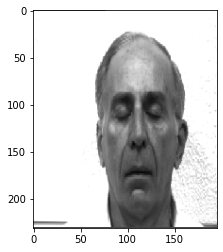

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [8]:
x_train=x.reshape(79,135135)
print(x_train.shape)


(79, 135135)


In [9]:
height=231
width=195
channel=3

In [10]:
import numpy as np
mean_face=np.zeros((1,height*width*channel))
for ele in x_train:
  mean_face=np.add(mean_face,ele)
mean_face=np.divide(mean_face,x_train.shape[0])

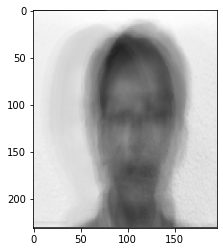

In [11]:
plt.imshow(mean_face.reshape(height,width,channel))

In [12]:
normalised_img=np.ndarray(shape=x_train.shape)
for i,ele in enumerate(x_train):
  normalised_img[i]=np.subtract(ele,mean_face)


In [13]:
print(normalised_img.shape)

(79, 135135)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


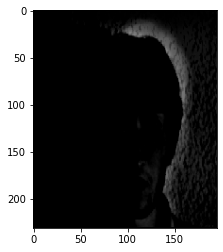

In [14]:
plt.imshow(normalised_img[1].reshape(height,width,channel))
plt.show()

In [15]:
cov_matrix = np.cov(normalised_img)
cov_matrix=np.divide(cov_matrix,9.0)
print(cov_matrix)

[[ 0.00302751 -0.00108296  0.00043489 ... -0.00071004 -0.00116823
  -0.00126209]
 [-0.00108296  0.00981488 -0.00275775 ... -0.00020137  0.00067836
   0.00093   ]
 [ 0.00043489 -0.00275775  0.0048451  ... -0.00048548 -0.00183249
  -0.00182505]
 ...
 [-0.00071004 -0.00020137 -0.00048548 ...  0.0049666   0.00291358
   0.00191068]
 [-0.00116823  0.00067836 -0.00183249 ...  0.00291358  0.00570254
   0.00271651]
 [-0.00126209  0.00093    -0.00182505 ...  0.00191068  0.00271651
   0.00467865]]


In [16]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors  \n%s' %eigenvectors)
print('\nEigenvalues  \n%s' %eigenvalues)

Eigenvectors  
[[ 0.04145049+0.j          0.03989116+0.j          0.02565171+0.j
  ... -0.00151286-0.0073868j  -0.00741554+0.00660705j
  -0.00741554-0.00660705j]
 [-0.16264146+0.j          0.00535387+0.j          0.13694851+0.j
  ... -0.00151286-0.0073868j  -0.00741554+0.00660705j
  -0.00741554-0.00660705j]
 [ 0.09290896+0.j          0.05099327+0.j          0.13032671+0.j
  ... -0.00151286-0.0073868j  -0.00741554+0.00660705j
  -0.00741554-0.00660705j]
 ...
 [-0.00788647+0.j         -0.16561239+0.j          0.04549646+0.j
  ... -0.00151286-0.0073868j  -0.00741554+0.00660705j
  -0.00741554-0.00660705j]
 [-0.05380585+0.j         -0.17702382+0.j         -0.02086053+0.j
  ... -0.00151286-0.0073868j  -0.00741554+0.00660705j
  -0.00741554-0.00660705j]
 [-0.03601593+0.j         -0.18079351+0.j         -0.04236718+0.j
  ... -0.00151286-0.0073868j  -0.00741554+0.00660705j
  -0.00741554-0.00660705j]]

Eigenvalues  
[ 2.15717865e-01+0.00000000e+00j  8.72872384e-02+0.00000000e+00j
  5.22603985e-02+

In [17]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [ ]:
print(eigvalues_sort)
print(eigvectors_sort)

[0.016141671617498302, 0.007066659720511722, 0.005293655392885601, 0.0035424892783286863, 0.0031347714022914135, 0.0029173118688175987, 0.0023394390559607213, 0.001679071472133274, 3.522132197660798e-18]
[array([ 0.26801351, -0.19685834,  0.64822434,  0.21259932,  0.12009017,
        0.02741994, -0.39575799, -0.24573954, -0.43799141]), array([-0.39133036,  0.06917809,  0.65016148, -0.16443276, -0.35741463,
       -0.37177748,  0.29847724,  0.10534669,  0.16179174]), array([ 0.62506775, -0.46282457, -0.06430627, -0.05981873, -0.30248774,
       -0.30179761,  0.15172247,  0.42618308, -0.01173839]), array([ 0.34442914,  0.04424462,  0.10089973, -0.46196775,  0.23273326,
       -0.22535893, -0.20513931, -0.41206492,  0.58222416]), array([-0.04548568, -0.41860339,  0.15285837, -0.46010543, -0.10945853,
        0.71651891,  0.23498474, -0.083006  ,  0.01229702]), array([-0.33935009, -0.33607462,  0.0772768 , -0.02998868,  0.28615123,
        0.02487497, -0.53374418,  0.55896276,  0.29189181]

Cumulative proportion of variance : 
[0.40041129+0.00000000e+00j 0.56243215+0.00000000e+00j
 0.65943688+0.00000000e+00j 0.7029117 +0.00000000e+00j
 0.73827724+0.00000000e+00j 0.76771819+0.00000000e+00j
 0.79461559+0.00000000e+00j 0.81758174+0.00000000e+00j
 0.83715444+0.00000000e+00j 0.84999961+0.00000000e+00j
 0.86262527+0.00000000e+00j 0.87259266+0.00000000e+00j
 0.88112859+0.00000000e+00j 0.88868414+0.00000000e+00j
 0.89561326+0.00000000e+00j 0.90156758+0.00000000e+00j
 0.90706933+0.00000000e+00j 0.91251465+0.00000000e+00j
 0.91761298+0.00000000e+00j 0.92237392+0.00000000e+00j
 0.9267637 +0.00000000e+00j 0.93054813+0.00000000e+00j
 0.9340461 +0.00000000e+00j 0.9373838 +0.00000000e+00j
 0.94043691+0.00000000e+00j 0.94344098+0.00000000e+00j
 0.94630688+0.00000000e+00j 0.9490334 +0.00000000e+00j
 0.95165133+0.00000000e+00j 0.95410965+0.00000000e+00j
 0.95653565+0.00000000e+00j 0.95891561+0.00000000e+00j
 0.96117243+0.00000000e+00j 0.96340846+0.00000000e+00j
 0.96551422+0.00000000e+00j 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


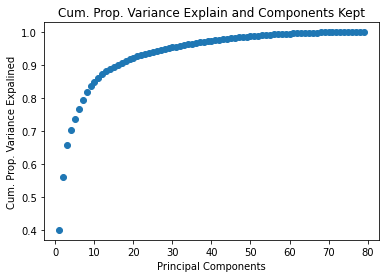

In [18]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)


print("Cumulative proportion of variance : \n%s" %var_comp_sum)


num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [19]:
reduced_data = np.array(eigvectors_sort[:20]).transpose()

In [21]:
proj_data = np.dot(x_train.transpose(),reduced_data)
proj_data = proj_data.transpose()

TypeError: ignored

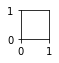

In [24]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width,channel)
    plt.subplot(2,10,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
w = np.array([np.dot(proj_data,i) for i in normalised_img])
w

array([[ 5.31854392e+03, -3.29242621e+03,  4.05807795e+03,
         1.57351096e+03, -3.82091566e+01, -1.10312908e+03,
         6.23579322e+02,  1.01109293e+02],
       [-4.06970747e+03,  3.39643190e+02, -3.10125835e+03,
        -1.31568526e+02, -2.08226759e+03, -1.55535267e+03,
         1.27103779e+03,  2.42080033e+02],
       [ 1.31817555e+04,  6.15475702e+03, -1.43762539e+02,
         1.15129341e+03,  1.66440992e+03,  1.08139142e+03,
         7.36771027e+02,  4.65369616e+02],
       [ 3.58606804e+03, -2.14364416e+03, -7.33309717e+02,
        -2.91355998e+03, -3.14771275e+03, -1.14638885e+03,
        -1.59786505e+03, -1.66149465e+03],
       [ 2.33433980e+03, -3.10067169e+03, -1.96122961e+03,
         9.66221179e+02, -4.72387304e+02,  9.74178723e+02,
        -1.43764584e+03,  1.02663287e+03],
       [ 7.40863775e+02, -2.94344209e+03, -1.82299313e+03,
        -6.52667274e+02,  3.21215645e+03,  4.46780299e+02,
         9.86323996e+02, -1.84225183e+02],
       [-8.00435458e+03,  2.273153

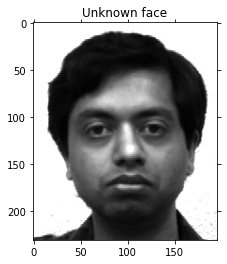

In [ ]:
 class NaiveBayes:
   def fit(self,X,y):
     n_samples,n_features= X.shape
     self._classes=np.unique(y)
     n_classes=len(self._classes)
     self._mean=np.zeros((n_classes,n_features), dtype=np.float64)
     self._var=np.zeros((n_classes,n_features), dtype=np.float64)
     self._priors=np.zeros(n_classes, dtype=np.float64)
     for i,c in enumerate(self._classes):
       X_c = X[c==y]
       self._mean[i,:] = X_c.mean(axis=0)
       self._var[i,:] = X_c.var(axis=0) 
       self._priors[i] = X_c.shape[0]/float(n_samples)
   def predict(self,X):
     ypred=[self._predict(x) for x in X]
     return ypred
   def _predict(self,x):
     posteriors=[]

     for i,c in enumerate(self._classes):
       prior= np.log(self._priors[i])
       class_conditional = np.sum(np.log(self._pdf(i,x)))
       posterior= prior+ class_conditional
       posteriors.append(posterior)
     return self._classes[np.argmax(posteriors)]


   def _pdf(self,class_index,x):
     mean=self._mean[class_index]
     var=self._var[class_index]
     numerator= np.exp(-(x-mean)**2/(2*var))
     denominator=np.sqrt(2*np.pi*var)
     return numerator/denominator

In [25]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_dir=os.path.join('/content/gdrive/My Drive/Dataset/test/')
test_generator=train_datagen.flow_from_directory(test_dir,
                                                  target_size=(231,195),
                                                  batch_size=9,
                                                  class_mode='categorical')

Found 2 images belonging to 2 classes.


In [26]:
unknown_face_vector,label=test_generator.next()
label=3
unknown_face_vector=unknown_face_vector.flatten()

In [ ]:
test.shape

(135135,)

In [27]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width,channel), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

ValueError: ignored

In [ ]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 6300.29944964,   754.47367169, -4042.51482897, -2662.79796391,
       -4310.01976773, -3231.51579724, -2803.35959418, -1142.42719047])

In [ ]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
np.argmin(norms)

[11703.66816434 11886.63918307 13254.34169193  5848.1808542
  9331.54835674 11787.35161313 16070.81436513 15405.0693902
 17736.54386938]


3